# ** Ok let's generate human mutability dictionaries** 

In [54]:
import pandas as pd
from Bio import AlignIO
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure 

In [36]:
import json
import numpy as np 

**generating the fastas dictionary** 

In [5]:
list_chroms = ['chr' + str(i) for i in range(1, 23)]
fastas_dict = {}   # creating dictionary with fasta alignment, length of seq, 
for chrom in list_chroms:
    filename_tmp = "/research/projects/hsapiens/mutability/data_o/MichealsonData/Ready_data/Sequence/{c}.fa".format(c=chrom)
    fastas_dict[chrom] = []
    fastas_dict[chrom].append(AlignIO.read(open(filename_tmp),"fasta"))
    alignment_tmp = fastas_dict[chrom][0]
    fastas_dict[chrom].append(len(str(alignment_tmp[0].seq)))

** reading in the 100k mutations file ** 

In [6]:
mutations_lines = open('/research/projects/hsapiens/mutability/analysis_o/hg18_hg38_merged.txt').readlines()

**making and filling the mutation dictionary **

In [27]:
#making the blank dictionary --> rememebr to always reblank if the loop ran halfway then quit, as we a rappending in the for loop below below, not resetting. 
mutations_dictionary_ref_alt = {}
nucleotides = ["A", "T", "C", "G"]

list_fuck_ups = []
indels = []

for base1 in nucleotides:
    for base2 in nucleotides:
        for base3 in nucleotides:
            triplet = base1+base2+base3
            mutations_dictionary_ref_alt[triplet] = [0,{}]
            for base_changing in nucleotides: 
                if base_changing != base2: 
                    mutations_dictionary_ref_alt[triplet][1][base1+base_changing+base3] = 0


                    
#filling the dictionary 
iterator = 0 

for line in mutations_lines: 
    row_split_tmp = line.split()
    if iterator >= 1: # skip the first lines 
        chrom_tmp = row_split_tmp[1]
        if chrom_tmp in list_chroms:
            site_number_tmp = row_split_tmp[2]
            site = [chrom_tmp, int(site_number_tmp)]
            #print(site)

            alignment = fastas_dict[site[0]][0]

            Ref_bp = row_split_tmp[8]
            New_bp = row_split_tmp[9]
            Ref_triplet= (str(alignment[0,site[1]-2:site[1]+1].seq)).upper()
            New_triplet = (str(alignment[0,site[1]-2])+str(New_bp)+str(alignment[0,site[1]])).upper()
            #print(Ref_bp); print(Ref_triplet); print(New_bp); print(New_triplet)

            if Ref_triplet == New_triplet: 
                #print(Ref_triplet +" "+New_triplet+" "+str(row_split_tmp[0])+"    "++"   "+(str(alignment[0,site[1]-2])+" "+Ref_bp+"   "+str(alignment[0,site[1]])+" "+New_bp)
                list_fuck_ups.append([Ref_triplet, New_triplet, row_split_tmp])
            elif  len(Ref_triplet) == 3 and  len(New_triplet)==3 : 
                #ok now time to add to dictionary 
                mutations_dictionary_ref_alt[Ref_triplet][0]+=1
                mutations_dictionary_ref_alt[Ref_triplet][1][New_triplet] += 1 
            else: 
                assert len(New_bp) >= 1
                indels.append([Ref_triplet, New_triplet, row_split_tmp]) # we dont want to include indels in our model anyways 
                

        
        #break
    else: 
        print("skipped")
        #print("skipped"+line)
    iterator += 1
    
    
 

skipped


In [29]:
len(list_fuck_ups),len(indels)

(5215, 2022)

In [1]:
mutations_dictionary_ref_alt = {'TGC': [1314, {'TAC': 812, 'TTC': 321, 'TCC': 181}], 'GCG': [2192, {'GGG': 54, 'GTG': 1978, 'GAG': 160}], 'AAG': [1027, {'ACG': 230, 'ATG': 172, 'AGG': 625}], 'AGA': [2010, {'ACA': 704, 'AAA': 955, 'ATA': 351}], 'GTT': [930, {'GGT': 164, 'GAT': 144, 'GCT': 622}], 'TTG': [981, {'TCG': 554, 'TAG': 157, 'TGG': 270}], 'CAA': [1023, {'CTA': 120, 'CGA': 602, 'CCA': 301}], 'GTG': [963, {'GGG': 191, 'GCG': 603, 'GAG': 169}], 'ATA': [2382, {'ACA': 1913, 'AAA': 294, 'AGA': 175}], 'TAA': [1240, {'TTA': 270, 'TGA': 703, 'TCA': 267}], 'TGA': [1527, {'TTA': 190, 'TCA': 389, 'TAA': 948}], 'ACC': [1728, {'ATC': 910, 'AGC': 268, 'AAC': 550}], 'AAT': [2304, {'AGT': 1782, 'ACT': 261, 'ATT': 261}], 'ATT': [2231, {'AGT': 253, 'ACT': 1661, 'AAT': 317}], 'GGA': [1560, {'GTA': 292, 'GCA': 336, 'GAA': 932}], 'TAC': [797, {'TGC': 571, 'TTC': 118, 'TCC': 108}], 'AGC': [1405, {'ATC': 216, 'ACC': 299, 'AAC': 890}], 'CCG': [2424, {'CAG': 28, 'CGG': 122, 'CTG': 2274}], 'CCT': [1788, {'CAT': 181, 'CTT': 1177, 'CGT': 430}], 'CGG': [2476, {'CCG': 107, 'CAG': 2348, 'CTG': 21}], 'TTC': [845, {'TGC': 197, 'TAC': 169, 'TCC': 479}], 'CCC': [1486, {'CAC': 178, 'CTC': 957, 'CGC': 351}], 'TCA': [1500, {'TTA': 943, 'TGA': 363, 'TAA': 194}], 'GCT': [1356, {'GTT': 865, 'GAT': 235, 'GGT': 256}], 'ACT': [1751, {'AGT': 424, 'AAT': 273, 'ATT': 1054}], 'GAC': [505, {'GCC': 85, 'GTC': 129, 'GGC': 291}], 'ATC': [1026, {'ACC': 592, 'AGC': 115, 'AAC': 319}], 'ACA': [2467, {'AAA': 417, 'ATA': 1618, 'AGA': 432}], 'ATG': [2255, {'ACG': 1625, 'AAG': 341, 'AGG': 289}], 'GCC': [1419, {'GTC': 866, 'GAC': 340, 'GGC': 213}], 'TTT': [1753, {'TAT': 326, 'TGT': 509, 'TCT': 918}], 'AAA': [1688, {'ACA': 510, 'ATA': 293, 'AGA': 885}], 'CTC': [769, {'CAC': 166, 'CGC': 169, 'CCC': 434}], 'CAG': [1330, {'CTG': 188, 'CGG': 860, 'CCG': 282}], 'TCT': [1968, {'TTT': 939, 'TAT': 348, 'TGT': 681}], 'GCA': [1440, {'GTA': 845, 'GGA': 242, 'GAA': 353}], 'TAT': [2465, {'TTT': 294, 'TGT': 1975, 'TCT': 196}], 'GGC': [1403, {'GTC': 333, 'GAC': 823, 'GCC': 247}], 'CTT': [1070, {'CAT': 148, 'CCT': 661, 'CGT': 261}], 'AGG': [1697, {'ACG': 370, 'ATG': 182, 'AAG': 1145}], 'TTA': [1273, {'TGA': 249, 'TCA': 724, 'TAA': 300}], 'CAC': [928, {'CTC': 176, 'CGC': 558, 'CCC': 194}], 'CGC': [2164, {'CAC': 1966, 'CTC': 132, 'CCC': 66}], 'CGT': [2877, {'CAT': 2651, 'CTT': 119, 'CCT': 107}], 'CGA': [1797, {'CTA': 40, 'CAA': 1660, 'CCA': 97}], 'GAA': [807, {'GTA': 160, 'GCA': 198, 'GGA': 449}], 'TAG': [716, {'TTG': 102, 'TCG': 114, 'TGG': 500}], 'AAC': [887, {'ATC': 134, 'ACC': 159, 'AGC': 594}], 'CAT': [2373, {'CTT': 352, 'CCT': 329, 'CGT': 1692}], 'GTA': [811, {'GCA': 599, 'GGA': 96, 'GAA': 116}], 'CCA': [1450, {'CTA': 1016, 'CAA': 138, 'CGA': 296}], 'AGT': [1795, {'ACT': 457, 'AAT': 1061, 'ATT': 277}], 'TGG': [1466, {'TTG': 159, 'TCG': 310, 'TAG': 997}], 'TGT': [2521, {'TTT': 413, 'TAT': 1652, 'TCT': 456}], 'GAG': [759, {'GGG': 411, 'GTG': 186, 'GCG': 162}], 'GGG': [1345, {'GTG': 161, 'GCG': 315, 'GAG': 869}], 'ACG': [2881, {'ATG': 2661, 'AAG': 131, 'AGG': 89}], 'TCC': [1543, {'TGC': 368, 'TAC': 236, 'TTC': 939}], 'CTA': [815, {'CAA': 110, 'CCA': 566, 'CGA': 139}], 'GAT': [985, {'GTT': 279, 'GGT': 587, 'GCT': 119}], 'GTC': [584, {'GCC': 342, 'GAC': 137, 'GGC': 105}], 'GGT': [1738, {'GTT': 541, 'GAT': 936, 'GCT': 261}], 'TCG': [1735, {'TTG': 1593, 'TAG': 55, 'TGG': 87}], 'CTG': [1344, {'CAG': 208, 'CGG': 277, 'CCG': 859}]}


In [4]:
with open('MutDict_2020_12_10.txt', 'w') as outfile:
    json.dump(mutations_dictionary_ref_alt, outfile)

** ok now so the same for the non- mutant sites from Rob's whole genome code ** 

In [10]:
#from ../HumanTripletCounts notebook 
RobString = "AAA :	 116219865 AAC :	 45054039 AAG :	 60506716 AAT :	 74983114 ACA :	 61496684 ACC :	 35209715 ACG :	 7954793 ACT :	 49169423 AGA :	 67980623 AGC :	 42741732 AGG :	 53953871 AGT :	 49109578 ATA :	 62191925 ATC :	 40532560 ATG :	 55516564 ATT :	 75663351 CAA :	 57170968 CAC :	 45873394 CAG :	 62322498 CAT :	 55814087 CCA :	 55568638 CCC :	 39882676 CCG :	 8495526 CCT :	 54101070 CGA :	 6847361 CGC :	 7416430  CGG :	 8705912 CGT :	 8010016 CTA :	 38950865 CTC :	 51615280 CTG :	 61556952 CTT :	 61394655 GAA :	 61143571 GAC :	 28896461 GAG :	 51713795 GAT :	 41018890 GCA :	 44177624 GCC :	 36081859 GCG :	 7479830 GCT :	 42326258 GGA :	 48024396 GGC :	 36067367 GGG :	 40000766 GGT :	 35209635 GTA :	 34395292 GTC :	 28621456 GTG :	 46474021 GTT :	 44703218 TAA :	 62229283 TAC :	 34006723 TAG :	 39242680 TAT :	 62088324 TCA :	 59937972 TCC :	 46873740 TCG :	 7049574 TCT :	 67921009 TGA :	 59920239 TGC :	 43840071 TGG :	 56641534 TGT :	 61864773 TTA :	 62028934 TTC :	 61013121 TTG :	 58719052  TTT :	 117589720"
rob_string_split = RobString.split()
rob_string_split = list(filter(lambda x: x != ":", rob_string_split))
triplet_genome_counts_dict = {}
for i in range(0,len(rob_string_split),2): 
    triplet = rob_string_split[i]
    count = rob_string_split[i+1]
    triplet_genome_counts_dict[triplet] = int(count)

In [11]:
number_sites = 0
for key in triplet_genome_counts_dict.keys(): 
    number_sites += int(triplet_genome_counts_dict[key])
    

# ** making the mutability model ** 

In [16]:
model = {}
for key, item in mutations_dictionary_ref_alt.items(): 
    n_muts = item[0]
    n_trips = triplet_genome_counts_dict[key]
    mut = n_muts/n_trips
    
    into_dict = {}
    for into_trip_key,value in item[1].items(): 
        into_dict[into_trip_key] = value/n_muts
    
    model[key] = [mut,into_dict]

In [68]:
with open('Model_2020_12_02_genomeWide.txt', 'w') as outfile:
    json.dump(model, outfile)

## **calculating overall mean**

In [33]:
model = json.load(open("Model_2020_12_02_genomeWide.txt"))

In [35]:
muts_list = []
for value in model.values():
    muts_list.append(value[0])

In [37]:
np.mean(muts_list)

6.122372566455623e-05

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

(array([54.,  2.,  0.,  0.,  0.,  0.,  1.,  4.,  1.,  2.]),
 array([1.31984440e-05, 4.80957583e-05, 8.29930725e-05, 1.17890387e-04,
        1.52787701e-04, 1.87685015e-04, 2.22582329e-04, 2.57479644e-04,
        2.92376958e-04, 3.27274272e-04, 3.62171586e-04]),
 <BarContainer object of 10 artists>)

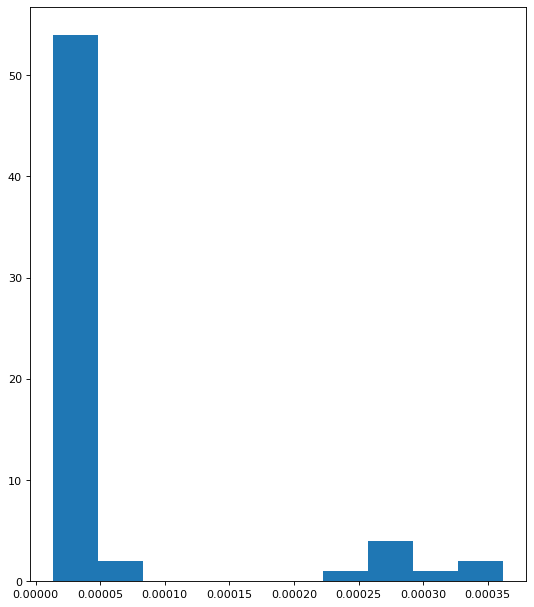

In [69]:
figure(figsize=(8, 9.5), dpi=80)#https://stackoverflow.com/questions/332289/how-do-you-change-the-size-of-figures-drawn-with-matplotlib
plt.hist(muts_list)

# plt.xlabel("Relative mutability", size=17)
# plt.xticks(rotation=45, size = 16)
# plt.yticks(size = 16)
# plt.title("Histogram of mutability in the 3-mer model", size = 18)

# # plt.show()
# # plt.savefig("plots/mutabilityHistogram_tripletModel_2021_09_14.png")

**54 triplets in the lowest mutability bin (which as min value of 1.31984440e-05)**
- max mutability = 3.6e-04